## Module 7 Project: datafun-07-ml

Title: Use Supervised Machine learning to create a linear regression model for a data set and then use that model to make predictions. 

Anjana Dhakal, 06/10/2024

## Import Dependencies 

In [173]:
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1: Chart a Straight Line

### 1. Define variable 'c' as a lambda function that converts fahrenheit to celsius. Then, store each Fahrenheit/Celsius pair as a tuple in temps

In [174]:
c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

### 2. Display the linear relationship between the Fahrenheit and Celsius temperatures.

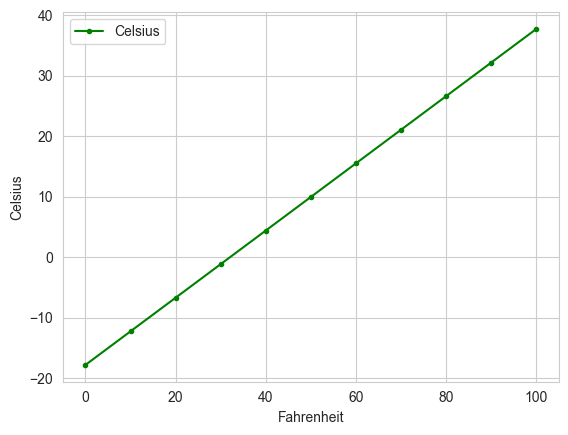

In [175]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-', color='green')
y_label = axes.set_ylabel('Celsius')

## Part 2: Predict Avg High Temp in NYC in January

### 1. Data Acquisition

In [176]:
nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')

### 2. Data Inspection

In [177]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [178]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### 3. Data Cleaning

In [179]:
#rename the 'Value' column as 'Temperature'
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [180]:
# remove the month(January) from all dates
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### 4. Descriptive Statistics

In [181]:
# set precision for descriptive statistics
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### 5. Build the Model

In [182]:
#calculate the slope
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
linear_regression.slope

0.014771361132966163

In [183]:
#calculate the intercept
linear_regression.intercept

8.694993233674289

### 6. Predict

In [184]:
#predict the average Fahrenheit temperature for January of 2019
nyc_temp_2019 = linear_regression.slope * 2019 + linear_regression.intercept
print(nyc_temp_2019)

38.51837136113297


In [185]:
#predict the average Fahrenheit temperature for January of 2024
nyc_temp_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print(nyc_temp_2024)

38.5922281667978


### 7. Visualizations

Use Seaborn’s regplot function to plot each data point with the dates on the x-axis and the temperatures on the y-axis.

Text(0.5, 1.0, 'Average High Temperature in January in NYC')

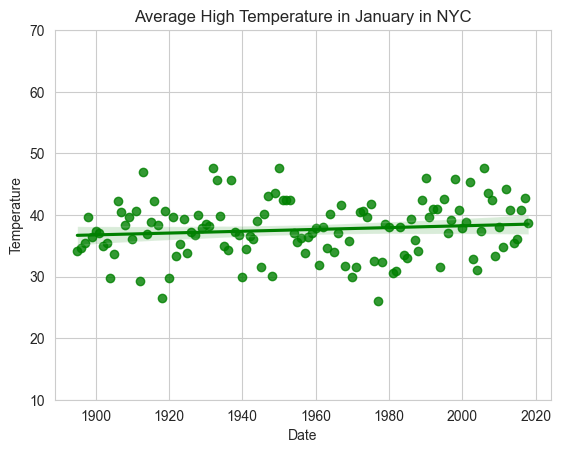

In [186]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature,  color='green')
axes.set_ylim(10, 70)
axes.set_title('Average High Temperature in January in NYC')